## 三种数据结构——Series、DataFrame 以及 Panel

Series 是带标签的一维数组，能够存储多种类型的数据，但同一个 Series 只能存储一种类型的数据。与 Numpy 的一维数组相比，它能够自定义行索引，方便快速地获取所需元素。Series 由两部分组成，分别为 values 和 index。其中 values 是一个 ndarray 数组类型的一维数组，index 则为行索引。

### series

单列多行的结构

In [1]:
import pandas as pd
price=pd.Series([5,4,2,6],index=(['包子','馅饼','油条','馄饨']))  
print(price)

包子    5
馅饼    4
油条    2
馄饨    6
dtype: int64


### dataframe

DataFrame 是 Pandas 的一个二维表格型数据结构。它拥有行、列两个轴向的索引，正是有了这些索引才使得 DataFrame 拥有了直观展示二维表格的特点

- 同时 DataFrame 也称为异构数据表，所谓异构即各列存储的数据类型是不同的，可以是整型、浮点型、字符型等等。它由行索引 index、列索引 columns 和值 values 组成。
- Series就是一张仅有一列的数据表，DataFrame就是由多个Series组合一起的数据表。

In [2]:
gongzi=pd.DataFrame({'基础工资':[6000,4000,3000],
'绩效':[500,500,0],
'是否全勤':['是','是','否'],
'请假天数':[0,0,5],
'总工资':[6500,4500,3000]},
index=['厨师','前台','服务员'])  
print(gongzi)

     基础工资   绩效 是否全勤  请假天数   总工资
厨师   6000  500    是     0  6500
前台   4000  500    是     0  4500
服务员  3000    0    否     5  3000


### Panel

Panel 是 Pandas 中的 3D 数据容器，它是一个三维数据结构，使用 Panel 能够存储多个 DataFrame 数据对象。

它有三个轴向，分别为 items（0 轴）、major_axis（1 轴）和 minor_axis（2 轴）。

其中，items 对应一个 DataFrame 对象，major_axis 和 minor_axis 两个轴分别对应 DataFrame 的行索引和列索引。

在实际应用中，该数据对象不常用，而主要应用 MultiIndex 对象创建多层索引的方式来表示多维数据。



**MultiIndex** 是 Pandas 的一个多层索引对象，能够对数据进行直观、灵活的操作并且能够表示高维数据。不过，该对象在实际应用时还是要结合 Series、DataFrame 对象才能够使用。

In [3]:
names=["张三","李四"]  
exems=["期中","期末"]  
columns = ["语文","数学"]  
index=pd.MultiIndex.from_product([names,exems])  
dic={'语文':[60,90,100,99],'数学':[30,40,90,100]}  
Score=pd.DataFrame(data=dic,index=index)  
print(Score)

        语文   数学
张三 期中   60   30
   期末   90   40
李四 期中  100   90
   期末   99  100


### 可读性强

In [4]:
import numpy as np 
Score=[[60,30],[90,40],[100,90]]  
Score_numpy=np.array(Score)  
Score_pandas=pd.DataFrame(Score,index=['钟馗','廉颇','妲己'],columns=['语文','数学'])  
print(Score_numpy)  
print(Score_pandas)

[[ 60  30]
 [ 90  40]
 [100  90]]
     语文  数学
钟馗   60  30
廉颇   90  40
妲己  100  90


In [5]:
import pandas as pd  
xinxi=pd.DataFrame({'姓名':['张飞','貂蝉','赵云'],'性别':['男','女','男'],'工资':[2000,2300,2200]})  
print(xinxi)

   姓名 性别    工资
0  张飞  男  2000
1  貂蝉  女  2300
2  赵云  男  2200


In [6]:
print(Score_pandas['语文'])  
print(Score_pandas.loc['廉颇'])

钟馗     60
廉颇     90
妲己    100
Name: 语文, dtype: int64
语文    90
数学    40
Name: 廉颇, dtype: int64


In [9]:
Stock=pd.read_csv('./股票.csv')  
print(Stock)

         date    open   close    high     low   volume
0  2020-01-02  16.024  16.244  16.324  15.924  1530231
1  2020-01-03  16.314  16.554  16.684  16.294  1116194
2  2020-01-06  16.384  16.444  16.714  16.284   862083


In [10]:
date_index=pd.to_datetime(Stock['date'])  
Stock.index=date_index  
print(Stock.loc['2020-01'])

                  date    open   close    high     low   volume
date                                                           
2020-01-02  2020-01-02  16.024  16.244  16.324  15.924  1530231
2020-01-03  2020-01-03  16.314  16.554  16.684  16.294  1116194
2020-01-06  2020-01-06  16.384  16.444  16.714  16.284   862083


### series 绘图

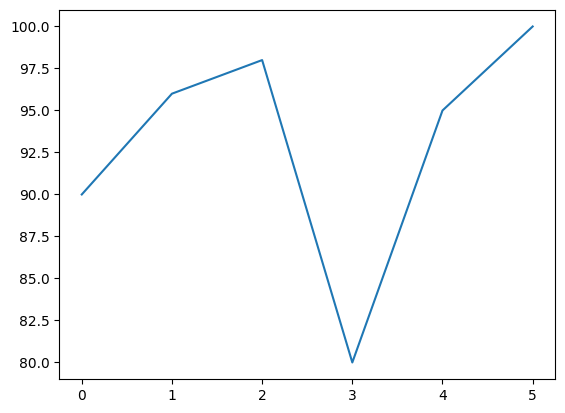

In [11]:
import matplotlib.pyplot as plt  
from pandas import DataFrame, Series  
data=[90,96,98,80,95,100]  
Score=pd.Series(data,index=range(6))  
Score.plot()  
plt.show()

Pandas 与 Numpy 最大的区别就在于：能够自定义行列标签，增加了数据的可读性，这也是其方便数据分析的因素之一。与 Numpy 相比，尽管它的运行效率较低，但它提供的各种聚类、分组、透视图等函数方法，能够帮助使用者快速进行数据分类。此外，Pandas 与 Numpy 还有一个区别就是它的数据结构能够存储多种数据类型的数据，而Numpy 只能存储一种数据类型的数据。由于在生活实验中，我们的数据往往是多样化的，数据类型也多是不同的，Pandas 的这个特性完美的解决了 Numpy 的这一问题，使得 Numpy 更适合进行数据分析。

